In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [3]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [4]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [5]:
for experiment in experiments:
    experiments[experiment] = pd.concat(experiments[experiment], axis=1)

## Analysis

#### Size

In [6]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['size-scalability'].columns if m in c]

In [7]:
metrics2columns

{'f1': ['977_f1', '15640_f1', '1955_f1', '3910_f1', '7820_f1'],
 'recall': ['977_recall',
  '15640_recall',
  '1955_recall',
  '3910_recall',
  '7820_recall'],
 'cost': ['977_cost', '15640_cost', '1955_cost', '3910_cost', '7820_cost'],
 'precision': ['977_precision',
  '15640_precision',
  '1955_precision',
  '3910_precision',
  '7820_precision'],
 'accuracy': ['977_accuracy',
  '15640_accuracy',
  '1955_accuracy',
  '3910_accuracy',
  '7820_accuracy']}

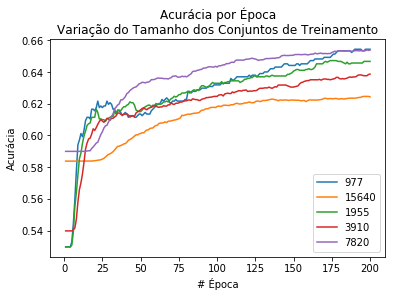

In [8]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['size-scalability']+"/size-accuracy.eps", format='eps')

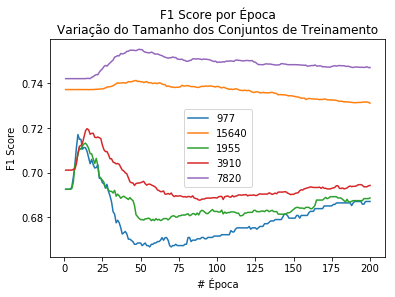

In [9]:
df = experiments['size-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("F1 Score por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("F1 Score")
plt.savefig(paths['size-scalability']+"/size-f1.eps", format='eps')

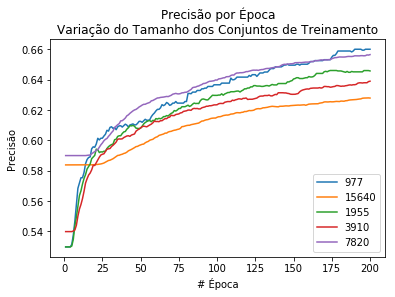

In [10]:
df = experiments['size-scalability'][metrics2columns['precision']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Precisão por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Precisão")
plt.savefig(paths['size-scalability']+"/size-precision.eps", format='eps')

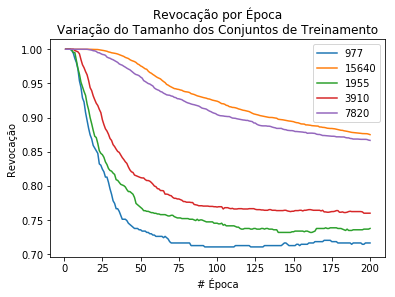

In [11]:
df = experiments['size-scalability'][metrics2columns['recall']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Revocação por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Revocação")
plt.savefig(paths['size-scalability']+"/size-recall.eps", format='eps')

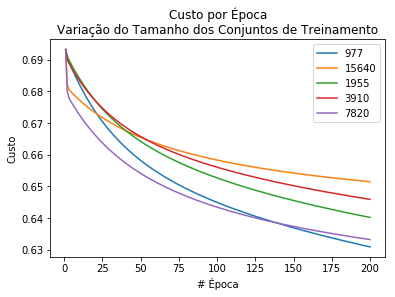

In [12]:
df = experiments['size-scalability'][metrics2columns['cost']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0]).rename(columns={"500":"592 Amostras", "2k":"2092 Amostras", "4k":"4092 Amostras", "8k":"8092 Amostras", "1k":"1092 Amostras"})
acc = df.plot()
acc.set_title("Custo por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Custo")
plt.savefig(paths['size-scalability']+"/size-cost.eps", format='eps')

#### Epochs

In [13]:
metrics2columns = {}
for m in metrics:
    metrics2columns[m] = [c for c in experiments['epoch-scalability'].columns if m in c]

In [14]:
metrics2columns

{'f1': ['400_f1', '100_f1', '800_f1', '50_f1', '200_f1'],
 'recall': ['400_recall',
  '100_recall',
  '800_recall',
  '50_recall',
  '200_recall'],
 'cost': ['400_cost', '100_cost', '800_cost', '50_cost', '200_cost'],
 'precision': ['400_precision',
  '100_precision',
  '800_precision',
  '50_precision',
  '200_precision'],
 'accuracy': ['400_accuracy',
  '100_accuracy',
  '800_accuracy',
  '50_accuracy',
  '200_accuracy']}

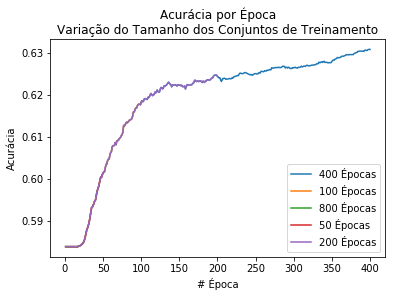

In [15]:
df = experiments['epoch-scalability'][metrics2columns['accuracy']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")
plt.savefig(paths['epoch-scalability']+"/epoch-accuracy.eps", format='eps')

Text(0, 0.5, 'Acurácia')

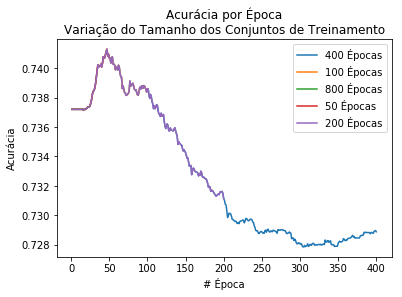

In [16]:
df = experiments['epoch-scalability'][metrics2columns['f1']]
df = df.loc[1:len(df)-1]
df = df.rename(columns=lambda x: x.split('_')[0] + " Épocas")
acc = df.plot()
acc.set_title("Acurácia por Época\nVariação do Tamanho dos Conjuntos de Treinamento")
acc.set_xlabel("# Época")
acc.set_ylabel("Acurácia")

In [17]:
df = experiments['size-scalability'][metrics2columns['accuracy']]
df = df.loc[-1]

KeyError: "['400_accuracy' '100_accuracy' '800_accuracy' '50_accuracy' '200_accuracy'] not in index"

## Teste

In [18]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'output_'
experiments = {k:{} for k in paths}

In [19]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                subtype_files.append(pd.read_csv(experiment_file).set_index('epoch'))
                experiments[experiment_type][subtype] = subtype_files

In [20]:
for experiment in experiments:
    subset = []
    for category in experiments[experiment]:
        df = pd.concat(experiments[experiment][category], axis=1)
        clean_df = pd.DataFrame()
        for column in set(df.columns):
            clean_df[column] = (df[column].sum(axis=1) - df[column].max(axis=1) - df[column].min(axis=1))/3
        subset.append(clean_df.rename(columns=lambda x: category+"_"+x))
    experiments[experiment] = subset

In [21]:
experiments['size-scalability'][3].loc[-1]

3910_f1           0.628170
3910_accuracy     0.532297
3910_recall       0.695611
3910_cost        -1.000000
3910_precision    0.572650
Name: -1, dtype: float64

In [22]:
clean_df['f1']

epoch
 1      0.737203
 2      0.737203
 3      0.737203
 4      0.737203
 5      0.737203
 6      0.737203
 7      0.737203
 8      0.737203
 9      0.737203
 10     0.737203
 11     0.737203
 12     0.737203
 13     0.737203
 14     0.737203
 15     0.737203
 16     0.737152
 17     0.737212
 18     0.737191
 19     0.737220
 20     0.737259
 21     0.737318
 22     0.737357
 23     0.737361
 24     0.737387
 25     0.737502
 26     0.737656
 27     0.737938
 28     0.738272
 29     0.738440
 30     0.738475
          ...   
 172    0.732626
 173    0.732577
 174    0.732595
 175    0.732529
 176    0.732480
 177    0.732474
 178    0.732352
 179    0.732155
 180    0.731909
 181    0.731978
 182    0.731920
 183    0.731641
 184    0.731734
 185    0.731636
 186    0.731647
 187    0.731534
 188    0.731460
 189    0.731378
 190    0.731304
 191    0.731356
 192    0.731407
 193    0.731449
 194    0.731409
 195    0.731569
 196    0.731611
 197    0.731611
 198    0.731620
 199    